In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def show_image(image):
    sample_image = plt.imread(image)
    plt.imshow(sample_image)
    plt.axis('off')
    plt.show()

# DFB
The main characteristics of our DFB laser are the following (if many values I've chosen the recommended values):

<img src="Images/DFB_table.png" width=800 />



<img src="Images/wavemeter_laser.png" width=500 />

wavemeter measure of the laser, however, I do not know how to interpret it, but I thought it was a good idea to include it

## Laser "case"

The current laser box is not very robust, especially where the current and temperature control plugs are. This design will need to be improved and made more robust, or there could be a decent risk of breaking from "mishandling".

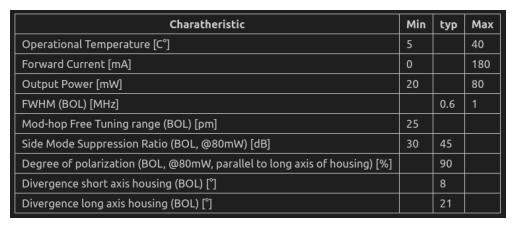

In [8]:
show_image("Images/DFB_table.png")

From the measures of the previous internship student in first approximation for $I_F\in[40mA,140mA]$ we have that:
$$P_{out}[mW] \approx 0.8708 \cdot I_F[mA] -33.06 $$

What is important is that the power of the laser at a fixed temperature is in good approximation linear with the current, and we can control the current through a waveform generator, and in good approximation, the error on the control of the current is then negligible.

The other important data is that the laser has a $FWHM\approx 1MHz$, so going forward it will be important to check that the linewidths we are going to adress are much larger than this.

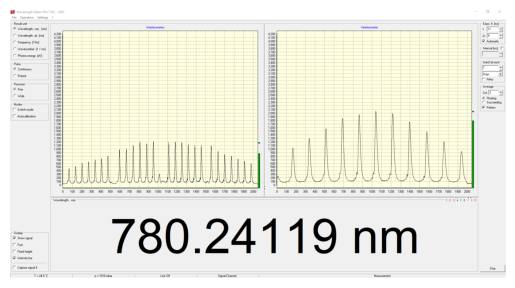

In [9]:
show_image('Images/wavemeter_laser.png')

# General scheme

The SAS part of the setup is as follows:

1. two mirrors to control the position of the laser beam
2. optical isolator to avoid retroreflection that could damage the laser
3. HWP+PBS to control SAS beam intensity
4. mirror to redirect the beam to the SAS path
5. OD filter to attenuate more the SAS beam intensity, so we can go to lower intensities if we want
6. HWP to control ratio between pump and probe powers
7. mirror to redirect the beam path
8. PBS that splits probe (transmitted) from pump (reflected)
9. lense system on the pump path so that the probe effectively "sees" the pump more homogeneous (pump becomes bigger than probe)

<img src="Images/SAS_scheme.png" width=400/>
<img src="Images/SAS_photo.jpg" width=600/>


# Plugs

Sometimes plugging instruments into different places can cause quite strong electrical noise.

My advice is to keep this in mind as a thing to try when you see noise in the signal.

We were seeing electrical noise when we had plugged the function generator, laser controls and SAS oscilloscope into different places, and the noise disappeared when we plugged everything into the same place (not sure if the oscilloscope was also problematic, but it's better to err on the safe side)

# Allineation

In order for SAS to work well you need the pump and probe beams to overlap.
To control the overlapping remember the general rule: to control the overlap on the cell side "close" from the pump use the close far mirror, to control the overlap "far" from the pump use the close mirror.

## Rough allineation

Turn up the power of pump and probe so that they are clearly visible, with the infrared card try to allineate them as much as possible. Once they are kind of aligned turn down the power as much as you can while still seeing the beams, this will in fact make the beam sizes smaller so you can better allineate them.

## Fine allineation

Once you see the signal you can fine-tune the allineation simply by maximizing the height of the SAS peaks on the oscilloscope

# Oscilloscope Data

DC and AC signals can have wildly different precision for the csv data file. This can be an issue if you need the DC signal (eg for data spectroscopy data analysis).

<img src="Images/DC_scope.jpeg" width=300/>
<img src="Images/DC_csv.png" width=300/>

The signal of the oscilloscope and what you save in DC can be wildly different in precision.

This was also a problem with another oscilloscope brand (Agilent), when you offset the DC signal a lot. The solution I found was to save the signals both in DC and AC, in order to "correct" the AC signal with the DC mean. Keep in mind that this works if you take a whole signal period, otherwise the AC mean will not be zero.


# Laser frequency scan

You can modulate via analog input the laser current. To do this you need to insert a BNC cable to MOD IN (R2). This port has an input impedance $>10k\Omega$ and can be modulated with a voltage in $[-10V,+10 ]$. The resulting current will be:

$$ I = I_{SET} + I_{max} \cdot \frac{V_{MOD}}{10 V} $$

You will notice that as the current increases the laser power increases but the frequency decreases. You can then "play" with the temperature control to change the power you have at the frequencies you need. Just keep in mind not to try to modulate the temperature for frequency modulation purposes, as the temperature has a certain "stabilization time".

## Problem

For some reason when modulating the current with a symmetric voltage signal the resulting signal is not symmetric. This is crucial if you want to lock. If your ramp starts for example with the down part then you should lock looking at the down part of the signal, otherwise when you turn the voltage control off you will not be at the frequency you thought you locked at.

<img src="Images/current_asymmetry.jpg" width=500 />



# Heating and Zeeman

The SAS cell has both heaters and a solenoid. Heating up the cell makes the SAS signal clearer, while we never tried to push for Zeeman spectroscopy.

Heating is the same as described in the EIT_cell document

# Locking

Right now we are locking in a very crude way: we scan the laser frequency with the voltage modulation and we center the frequency we want (eg SAS peak) at the 0V position, then turn off the frequency modulation.

This method can work if the timescale of frequency drifts is negligible compared to the data acquisition times, otherwise, PID stabilization could be necessary.

It is not super clear how critical it is to lock at the exact frequency, as Doppler broadening could in fact broaden significantly the frequency region that yealds a signal. However, this is not well understood, so locking well is better.

## Possible Improvements

### PID control

self-explanatory

### Frequency control
Selecting the desired frequency with the laser current knob is not so easy, as it has a high sensitivity. It would be better to select the frequency with a DC voltage offset through the analog input of the laser current control.

This could be realized in the following way:

- ramp voltage scan with zero offset: this is used to scan the frequency and check once in a while that we are still centered where we want, the SAS oscilloscope is locked to this signal so as soon as we turn the scan on we immediately see it on the oscilloscope
- DC voltage in series: this is used to fine-tune the frequency, the offset remains even when we turn off the scanning voltage ramp